#PANDA


# Importando as bibliotecas:

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

#Informações do dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/database/train.csv')
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Podemos dropar as colunas 'Unnamed: 0' e 'id', pois não auxiliam no nosso trabalho.

In [ ]:
df.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


# Os atributos são:
Gender: Gênero dos passageiros (Female, Male)

Customer Type: Tipo de cliente (Loyal customer, disloyal customer)

Age: Idade dos passageiros

Type of Travel: Propósito de viagem dos passageiros (Personal Travel, Business Travel)

Class: Classe de viagem dos passageiros (Business, Eco, Eco Plus)

Flight distance: Distância de viagem

Inflight wifi service: Nível de satisfação com o wifi do voo (0:Not Applicable;1-5)

Departure/Arrival time convenient: Nível de satisfação com a hora de partida / chegada

Ease of Online booking: Nível de satisfação com a reserva online

Gate location: Nível de satisfação com a localização do portão de embarque

Food and drink: Nível de satisfação com a comida e bebida

Online boarding: Nível de satisfação com o embarque online

Seat comfort: Nível de satisfação com o conforto do assento

Inflight entertainment: Nível de satisfação com o entretenimento a bordo

On-board service: Nível de satisfação com o serviço de bordo

Leg room service: Nível de satisfação com o espaço para as pernas

Baggage handling: Nível de satisfação com o manuseio de bagagem

Check-in service: Nível de satisfação com o serviço de check-in

Inflight service: Nível de satisfação com o serviço de bordo

Cleanliness: Nível de satisfação com a limpeza

Departure Delay in Minutes: Atraso de partida em minutos

Arrival Delay in Minutes: Atraso de chegada em minutos

Satisfaction: Nível de satisfação com a companhia aérea(Satisfaction, neutral or dissatisfaction)

Os atributos com níveis de satisfação se organizam de 1 a 5.

#Normalização

In [ ]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
def normalize_dataset(dataset):
    numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
    scaler = MinMaxScaler()
    dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])

    return dataset


In [ ]:
df_normalizado = normalize_dataset(df)
df_normalizado

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,0.076923,Personal Travel,Eco Plus,0.086632,0.6,0.8,0.6,0.2,...,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364,neutral or dissatisfied
1,Male,disloyal Customer,0.230769,Business travel,Business,0.041195,0.6,0.4,0.6,0.6,...,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788,neutral or dissatisfied
2,Female,Loyal Customer,0.243590,Business travel,Business,0.224354,0.4,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000,satisfied
3,Female,Loyal Customer,0.230769,Business travel,Business,0.107229,0.4,1.0,1.0,1.0,...,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682,neutral or dissatisfied
4,Male,Loyal Customer,0.692308,Business travel,Business,0.036955,0.6,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,0.205128,Business travel,Eco,0.032512,0.4,0.2,0.4,0.6,...,0.4,0.6,0.2,0.75,0.4,0.6,0.4,0.001884,0.000000,neutral or dissatisfied
103900,Male,Loyal Customer,0.538462,Business travel,Business,0.467690,0.8,0.8,0.8,0.8,...,1.0,1.0,1.0,1.00,1.0,1.0,0.8,0.000000,0.000000,satisfied
103901,Male,disloyal Customer,0.294872,Business travel,Business,0.396607,0.2,0.2,0.2,0.6,...,0.8,0.6,0.4,0.75,1.0,1.0,0.8,0.004397,0.008838,neutral or dissatisfied
103902,Female,disloyal Customer,0.192308,Business travel,Eco,0.195679,0.2,0.2,0.2,1.0,...,0.2,0.8,1.0,0.00,1.0,0.8,0.2,0.000000,0.000000,neutral or dissatisfied


# Matriz de correlação

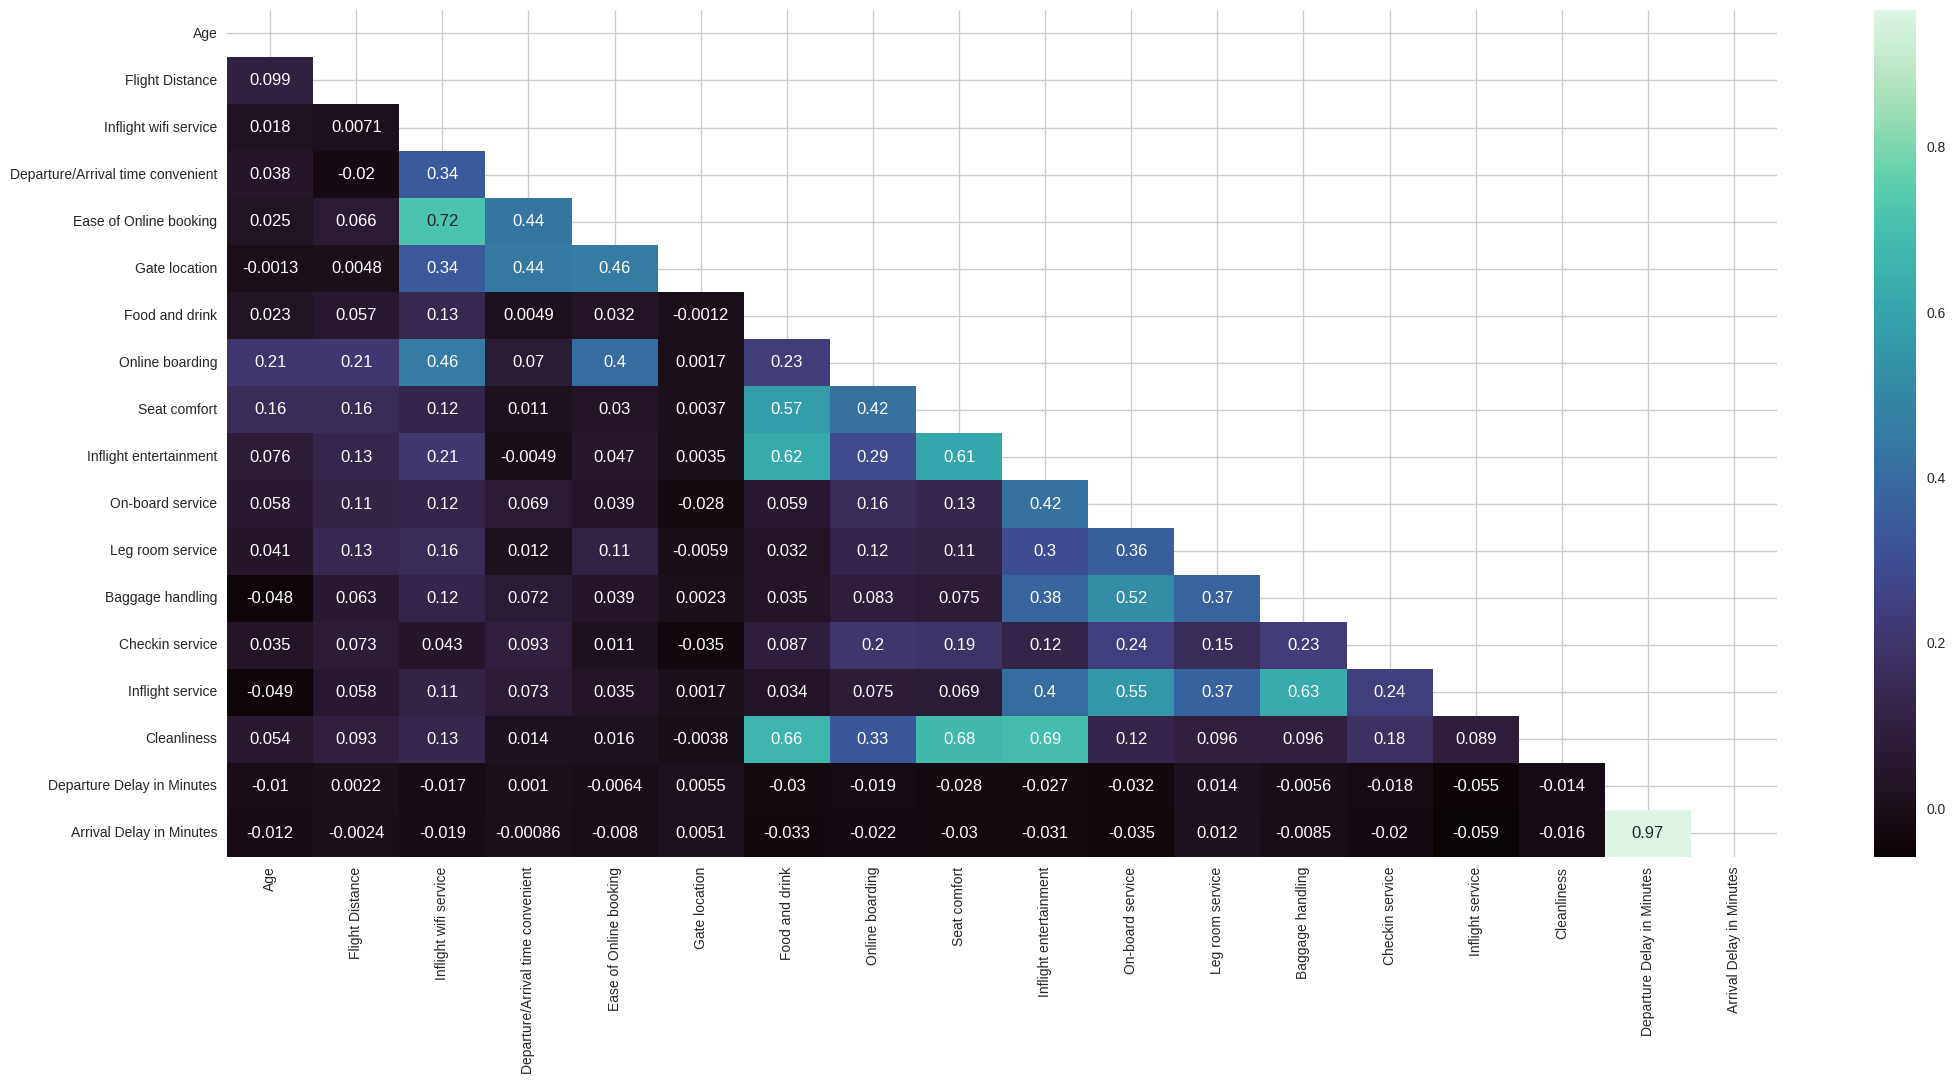

In [ ]:
corr = df_normalizado.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25, 11))
sns.heatmap(df_normalizado.corr(), mask=mask, cmap='mako', annot = True) # annot=None para mostrar os valores
plt.show()

Podemos verificar que a maior correlação é entre Arrival Delay in Minutes e Departure Delay in Minutes.

# Verificação de dados faltantes

In [ ]:
df_normalizado.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Arrival Delay in Minutes apresenta 310 dados faltantes. Como a sua correlação com Departure Delay in Minutes é alta, podemos remover esse atributo do dataframe.

In [ ]:
df_normalizado.drop('Arrival Delay in Minutes', axis = 1, inplace = True)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,0.076923,Personal Travel,Eco Plus,0.086632,0.6,0.8,0.6,0.2,...,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,neutral or dissatisfied
1,Male,disloyal Customer,0.230769,Business travel,Business,0.041195,0.6,0.4,0.6,0.6,...,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,neutral or dissatisfied
2,Female,Loyal Customer,0.243590,Business travel,Business,0.224354,0.4,0.4,0.4,0.4,...,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,satisfied
3,Female,Loyal Customer,0.230769,Business travel,Business,0.107229,0.4,1.0,1.0,1.0,...,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,neutral or dissatisfied
4,Male,Loyal Customer,0.692308,Business travel,Business,0.036955,0.6,0.6,0.6,0.6,...,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,0.205128,Business travel,Eco,0.032512,0.4,0.2,0.4,0.6,...,0.4,0.4,0.6,0.2,0.75,0.4,0.6,0.4,0.001884,neutral or dissatisfied
103900,Male,Loyal Customer,0.538462,Business travel,Business,0.467690,0.8,0.8,0.8,0.8,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,0.8,0.000000,satisfied
103901,Male,disloyal Customer,0.294872,Business travel,Business,0.396607,0.2,0.2,0.2,0.6,...,1.0,0.8,0.6,0.4,0.75,1.0,1.0,0.8,0.004397,neutral or dissatisfied
103902,Female,disloyal Customer,0.192308,Business travel,Eco,0.195679,0.2,0.2,0.2,1.0,...,0.2,0.2,0.8,1.0,0.00,1.0,0.8,0.2,0.000000,neutral or dissatisfied


#Verificação de dados duplicados

In [ ]:
df_normalizado.duplicated().value_counts()

False    103904
dtype: int64

O dataframe não possui nenhum dado duplicado.

# Verificação de outliers

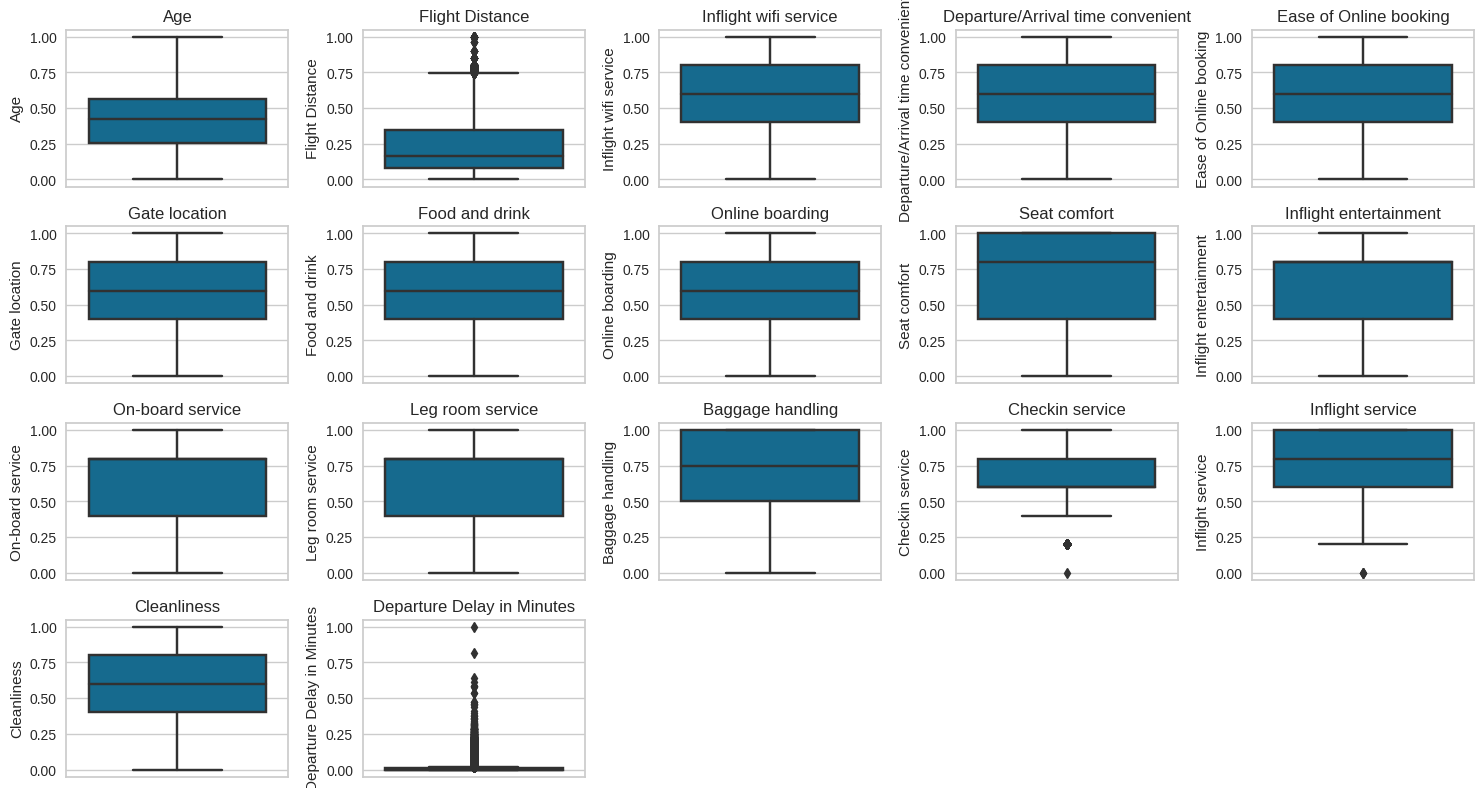

In [ ]:
colunas_numericas = df_normalizado.select_dtypes(include=['number'])

# Crie uma figura com subplots para os boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(colunas_numericas.columns):
    plt.subplot(5, 5, i + 1)  # 5 linhas x 5 colunas de subplots
    sns.boxplot(y=df_normalizado[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

Podemos perceber pelos gráficos que existem outliers em Flight Distance, Checkin service, Inflight service e Departure Delay in minutes.

Removendo os outliers:

In [ ]:
Q1_a = df.quantile(0.25)
Q3_a = df.quantile(0.75)
IQR_a = Q3_a - Q1_a
print(IQR_a)

Age                                  0.307692
Flight Distance                      0.268376
Inflight wifi service                0.400000
Departure/Arrival time convenient    0.400000
Ease of Online booking               0.400000
Gate location                        0.400000
Food and drink                       0.400000
Online boarding                      0.400000
Seat comfort                         0.600000
Inflight entertainment               0.400000
On-board service                     0.400000
Leg room service                     0.400000
Baggage handling                     0.500000
Checkin service                      0.200000
Inflight service                     0.400000
Cleanliness                          0.400000
Departure Delay in Minutes           0.007538
dtype: float64


In [ ]:
df = df[~((df < (Q1_a - 1.5 * IQR_a)) |(df > (Q3_a + 1.5 * IQR_a))).any(axis=1)]
df.shape

(76347, 22)

In [ ]:
Q1 = df_normalizado.quantile(0.25)
Q3 = df_normalizado.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                                  0.307692
Flight Distance                      0.268376
Inflight wifi service                0.400000
Departure/Arrival time convenient    0.400000
Ease of Online booking               0.400000
Gate location                        0.400000
Food and drink                       0.400000
Online boarding                      0.400000
Seat comfort                         0.600000
Inflight entertainment               0.400000
On-board service                     0.400000
Leg room service                     0.400000
Baggage handling                     0.500000
Checkin service                      0.200000
Inflight service                     0.400000
Cleanliness                          0.400000
Departure Delay in Minutes           0.007538
dtype: float64


In [ ]:
df_normalizado = df_normalizado[~((df_normalizado < (Q1 - 1.5 * IQR)) |(df_normalizado > (Q3 + 1.5 * IQR))).any(axis=1)]
df_normalizado.shape

(76347, 22)

#Mapeamento de Strings para floats

Precisamos mapear as strings para floats para realizar o PCA.

In [ ]:
df_normalizado['Customer Type'] = df_normalizado['Customer Type'].map({'Loyal Customer': 0, 'disloyal Customer': 1})
df_normalizado['satisfaction'] = df_normalizado['satisfaction'].map({'satisfied': 0, 'neutral or dissatisfied': 1})
df_normalizado['Gender'] = df_normalizado['Gender'].map({'Male': 0, 'Female': 1})
df_normalizado['Type of Travel'] = df_normalizado['Type of Travel'].map({'Personal Travel': 0, 'Business travel': 1})
df_normalizado['Class'] = df_normalizado['Class'].map({'Eco': 0, 'Business': 1 , 'Eco Plus':2})

#PCA

Realizaremos também um PCA para reduzir o número de dimensões e podermos visualizar os clusters em um plano.

In [ ]:
pca = PCA(2)
dados_pca = pca.fit_transform(df_normalizado)
dados_pca.shape

(76347, 2)

#K-Means com PCA

Para utilizar o K-Means, precisamos encontrar o "cotovelo" que defina o melhor K.

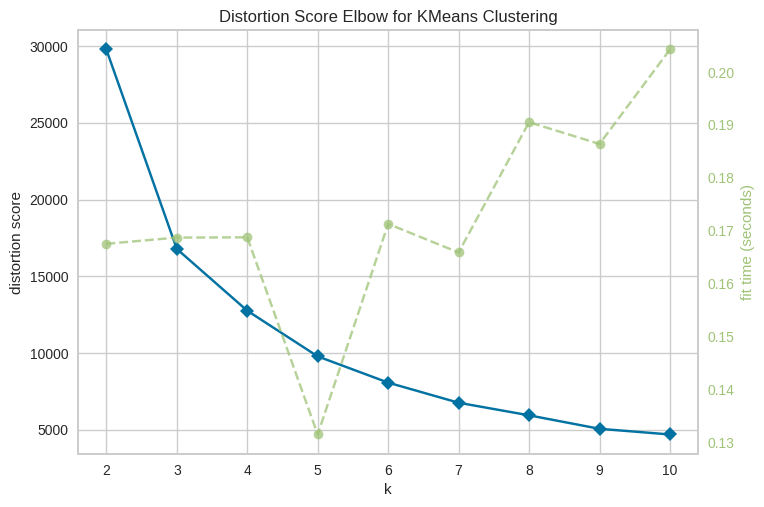

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
elbow=KElbowVisualizer(KMeans(n_init='auto',random_state=1), k=10, locate_elbow=False)
elbow.fit(dados_pca)

elbow.show()

Utilizaremos K = 3.




In [ ]:
kmeans = KMeans(n_clusters=3,n_init='auto',random_state=1)
kmeans.fit(dados_pca)
kmeans_predict = kmeans.predict(dados_pca)


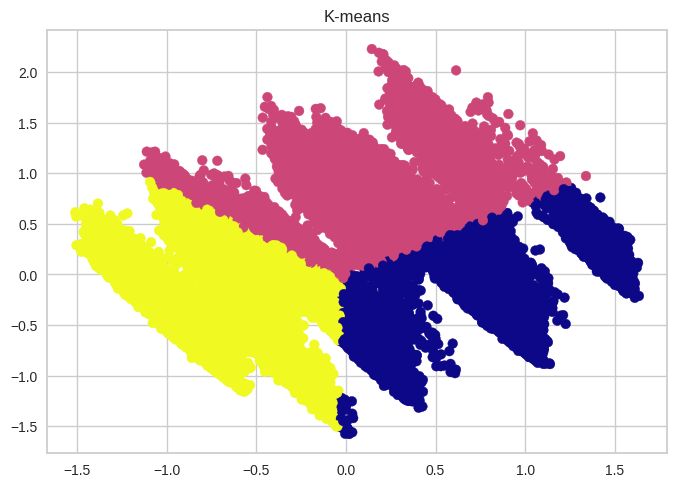

In [ ]:
plt.scatter(dados_pca[:,0], dados_pca[:,1], c=kmeans_predict, cmap="plasma")
plt.xlabel("")
plt.ylabel("")
plt.title("K-means")

plt.show()

In [ ]:
silhouette_kmeans_pca = (silhouette_score(dados_pca, kmeans_predict))
silhouette_kmeans_pca

0.5245802868815245

#K-Means sem PCA

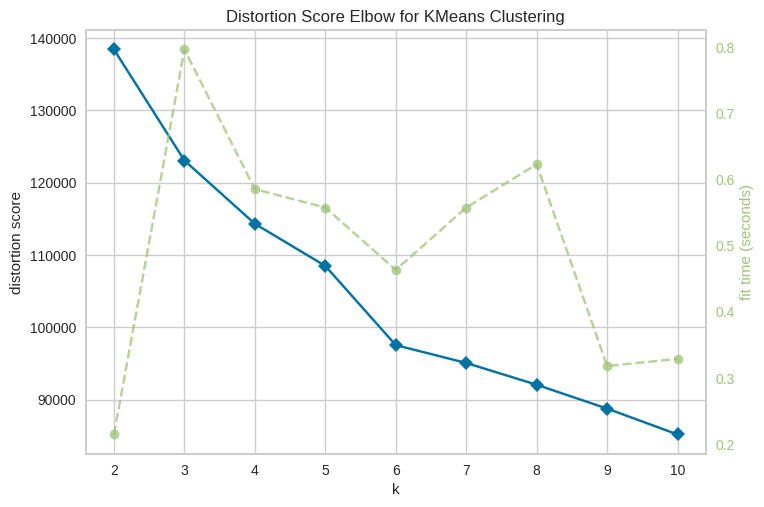

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
elbow=KElbowVisualizer(KMeans(n_init='auto',random_state=1), k=10, locate_elbow=False)
elbow.fit(df_normalizado)

elbow.show()

Usando K=5

In [ ]:
kmeans = KMeans(n_clusters=5,n_init='auto',random_state=1)
kmeans.fit(df_normalizado)
kmeans_predict = kmeans.predict(df_normalizado)

In [ ]:
silhouette_kmeans_sem_pca = (silhouette_score(df_normalizado, kmeans_predict))
silhouette_kmeans_sem_pca

0.15434421420560238

#HDBSCAN com PCA

In [ ]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 17.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039175 sha256=8af08d8960b09ca4f8b8865af03aebf892972676cb17afe73735acf53324e61c
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan


In [ ]:
import hdbscan

In [ ]:
clusterer = hdbscan.HDBSCAN(cluster_selection_epsilon=0.20,min_samples=20,min_cluster_size=20)
clusterer.fit(dados_pca)
hdbscan_predict_pca = clusterer.fit_predict(dados_pca)

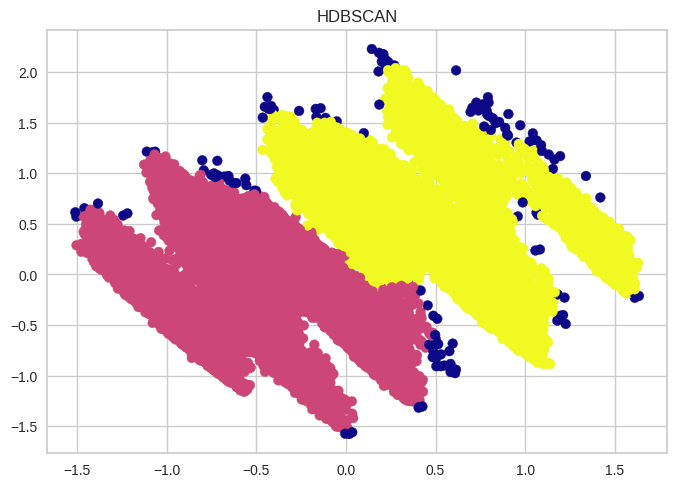

In [ ]:
plt.scatter(dados_pca[:,0], dados_pca[:,1], c=hdbscan_predict_pca, cmap="plasma")
plt.xlabel("")
plt.ylabel("")
plt.title("HDBSCAN")

plt.show()

In [ ]:
silhouette_hdbscan_pca = (silhouette_score(dados_pca, hdbscan_predict_pca))
silhouette_hdbscan_pca

0.46882710826934276

#HDBSCAN sem PCA

In [ ]:
clusterer = hdbscan.HDBSCAN()
clusterer.fit(df_normalizado)
hdbscan_predict = clusterer.fit_predict(df_normalizado)

In [ ]:
silhouette_hdbscan_sem_pca = (silhouette_score(df_normalizado, hdbscan_predict))
silhouette_hdbscan_sem_pca

0.18064718269843227

#Comparando resultados

In [ ]:
comparacao = {
    'K-Means': [silhouette_kmeans_pca, silhouette_kmeans_sem_pca],
    'HDBSCAN': [silhouette_hdbscan_pca, silhouette_hdbscan_sem_pca]
}
indices = ['Com PCA', 'Sem PCA']
df_comp = pd.DataFrame(comparacao, index=indices)
df_comp.T

,Com PCA,Sem PCA
K-Means,0.524580,0.154344
HDBSCAN,0.468827,0.180647


Utilizando o HDBSCAN com PCA e alterando os parâmetros de forma aleatória, conseguimos obter 0.4688 como maior silhouette score. Em comparação com o K-Means com PCA, com 0.5245, o HDBSCAN teve um desempenho um pouco pior.

#Interpretação dos clusters

Utilizando o resultado produzido pelo K-Means com PCA, podemos interpretar os clusters gerados.

In [ ]:
kmeans_predict

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
df['Cluster'] = kmeans_predict
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Cluster
0,Male,Loyal Customer,0.076923,Personal Travel,Eco Plus,0.086632,0.6,0.8,0.6,0.2,...,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,neutral or dissatisfied,0
2,Female,Loyal Customer,0.243590,Business travel,Business,0.224354,0.4,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,satisfied,0
4,Male,Loyal Customer,0.692308,Business travel,Business,0.036955,0.6,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,satisfied,0
5,Female,Loyal Customer,0.243590,Personal Travel,Eco,0.232027,0.6,0.8,0.4,0.2,...,0.2,0.6,0.8,0.75,0.8,0.8,0.2,0.000000,neutral or dissatisfied,2
6,Male,Loyal Customer,0.512821,Personal Travel,Eco,0.251414,0.4,0.8,0.4,0.6,...,0.4,0.6,0.6,0.75,0.6,1.0,0.4,0.005653,neutral or dissatisfied,2


<Axes: xlabel='Cluster', ylabel='count'>

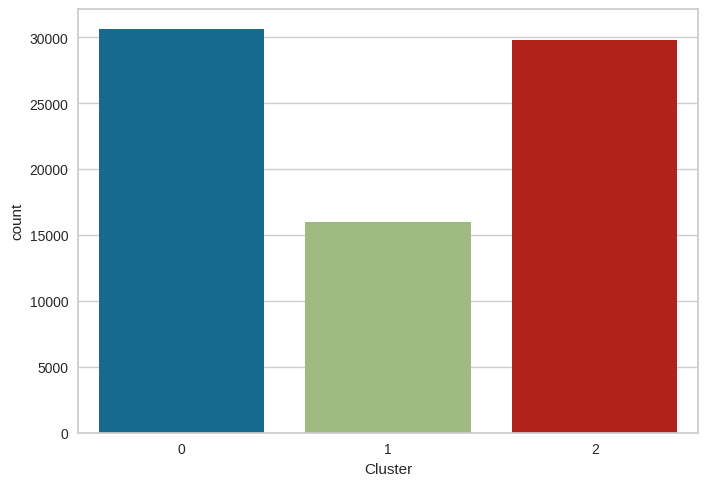

In [ ]:
#Frequências dos clusters
sns.countplot(x = 'Cluster', data = df)

Cluster 0 é o com maior número de pessoas, enquanto o cluster 2 apresenta quase a mesma quantidade de pessoas e o cluster 1 é o que possui menos pessoas.

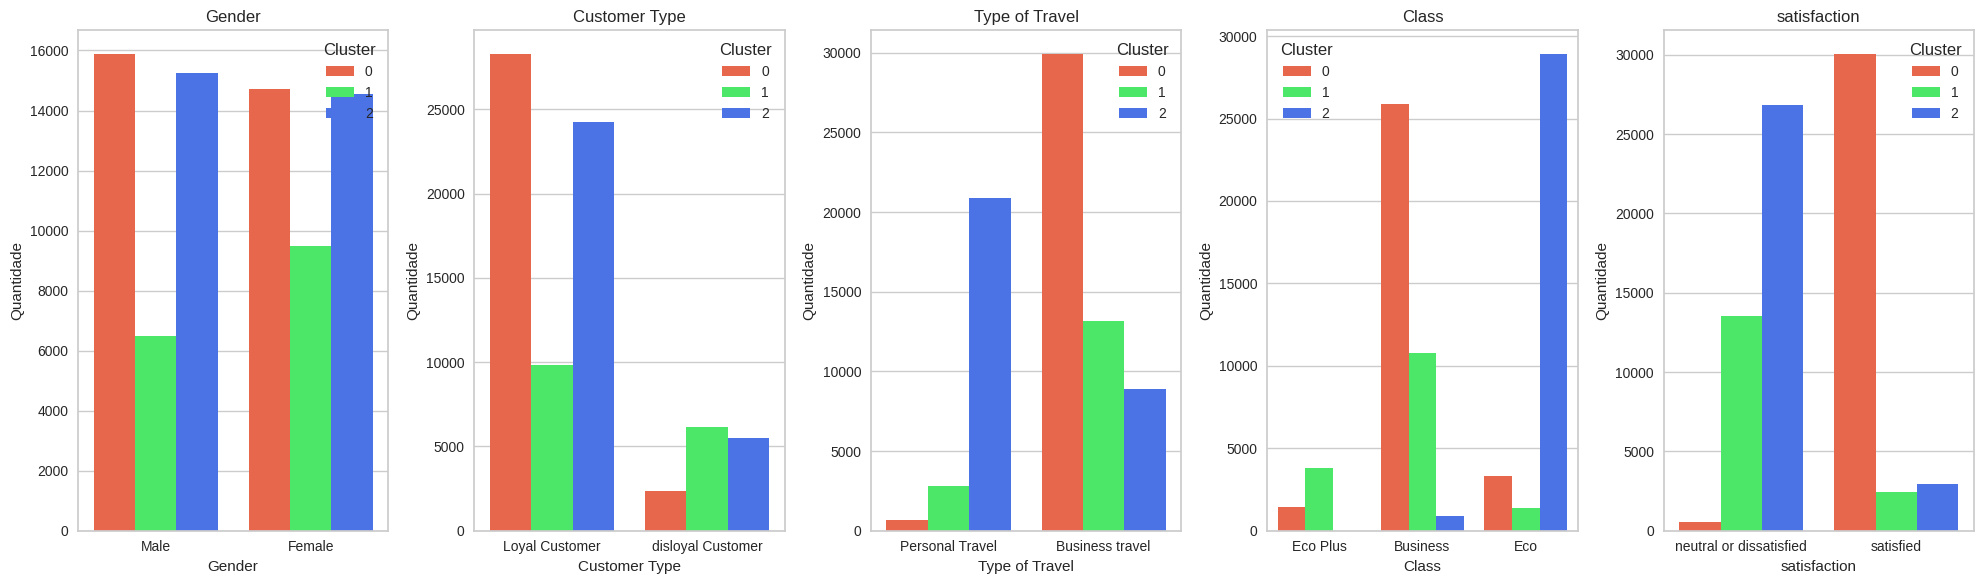

In [ ]:

Categoricas = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

fig, axes = plt.subplots(1, 5, figsize=(20, 6))


for i, var in enumerate(Categoricas):
    ax = axes[i]

    sns.countplot(data=df, x=var, hue='Cluster', ax=ax, palette =  ["#FF5733", "#33FF57", "#3366FF"])
    ax.set_xlabel(var)
    ax.set_ylabel('Quantidade')
    ax.set_title(f'{var}')


plt.tight_layout()

plt.show()

Interpretando os gráficos:



*   Cluster 0:\
O Cluster 0 tem quase a mesma proporção de homens e mulheres, mas com um pouco mais de homens. \
Os indivíduos presentes nesse cluster são em sua maioria clientes leais, pessoas que fazem viagem a negócios, voam na clase executiva e estão satisfeitos com o serviço prestado.
*   Cluster 1:\
O Cluster 1 tem mais mulheres do que homens.\
Os indivíduos também são mais clientes leais, apesar de existirem mais clientes desleais em comparação com o cluster 0. São também pessoas que fazem mais viagens a negócios e que viajam mais através da classe executiva, embora sejam também os que mais viajam na Eco Plus. Sua satisfação é em sua maioria neutra ou insatisfeita.
* Cluster 2:\
O Cluster 2 tem também quase a mesma proporção de homens e mulheres, mas com um pouco mais de homens.\
Os indivíduos são em sua maioria clientes leais, que fazem mais viagens de caráter pessoal e viajam mais pela classe econômica. Sua satisfação com o serviço é em maioria neutra ou insatisfeita.

